## 1. Perkenalan

DS=Suma Bimantoro Andru

## 2.- Import Libraries

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 3 - Data Loading

In [3]:
#import data train
data1=pd.read_csv('Train-1542865627584.csv') #label #done
data2=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
data3=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
data4=pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [4]:
#import data test
datates1=pd.read_csv('Test-1542969243754.csv') 
datates2=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
datates3=pd.read_csv('Test_Inpatientdata-1542969243754.csv')
datates4=pd.read_csv('Test_Outpatientdata-1542969243754.csv')

## 4 - EDA Dan Preproses Data


In [5]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
#membuat fungsi untuk plot
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

### Analyze Train/Test Data (Class labels)

In [6]:
#tampilkan Head train
data1.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


Peneliti merencanakan plot di bawah ini untuk memeriksa distribusi label kelas.

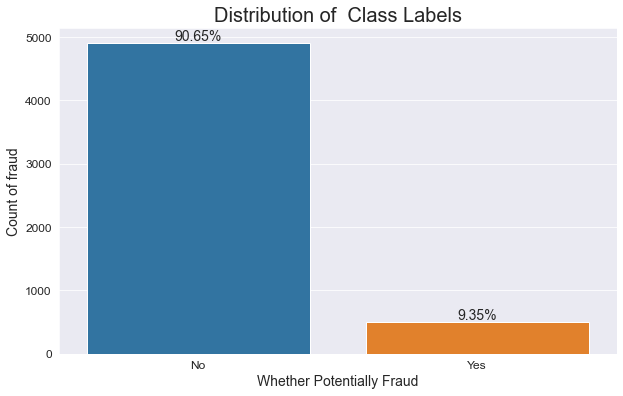

In [7]:
# Periksa distribusi provider potensial fraud
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=data1)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, data1['PotentialFraud'], 0,40,14)

Terlihat dataset `unbalance dimana 9.35% pontensial Fraud dan 90.65% tidak Fraud`

### EDA Train_Beneficiary/Test_Beneficiary Data

In [8]:
# menampilkan semua columns di dataset beneficiary/penerima
pd.set_option('display.max_columns', None)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

Terlihat ada 25 columns dan 138.556 row data 

In [51]:
data2.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [53]:
# Peneliti merubah kronis kondisi dari 2 ke 0

data2 = data2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# Untuk Indikator Penyakit Ginjal mengganti 'Y' dengan 1
data2 = data2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

datates2 = datates2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

datates2 = datates2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

`Peneliti merubah kronis kondisi dari 2 ke 0, dari sini bisa dilihat bahwa penyakit kronis ditandakan 2 adalah false dan 1 adalah true, jadi peneliti memutuskan untuk merubah dari 2 ke 0`

In [55]:
# konversi semua tipe data kolom ini menjadi numerik
data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

#  konversi semua tipe data kolom ini menjadi numerik
datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)



In [58]:
# Mengganti '2' dengan '0' untuk Jenis Kelamin
data2 = data2.replace({'Gender': 2}, 0)

datates2 = datates2.replace({'Gender': 2}, 0)

`Peneliti merubah untuk gender dimana 0 untuk perempuan dan laki-laki adalah 1, tetapi ini adalah personal analisa dari peneliti .`

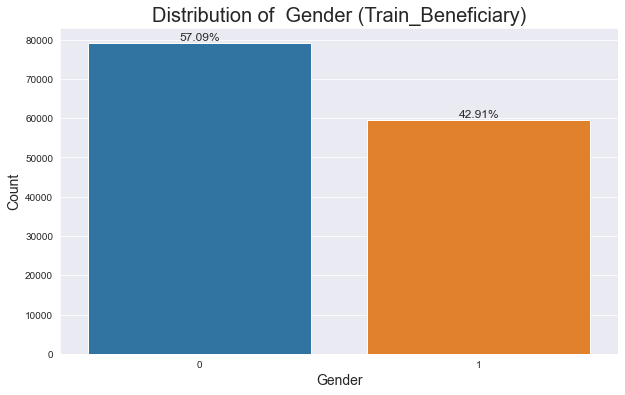

In [59]:
# Plot distribusi dari gender di data Beneficiaries
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=data2, order = data2['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data2['Gender'], 0,800,12)

### Pengamatan:
- Rasio gender pada data penerima manfaat adalah 
1. Gender_0 :  57,09%
2. Gender1  : 42,91%.

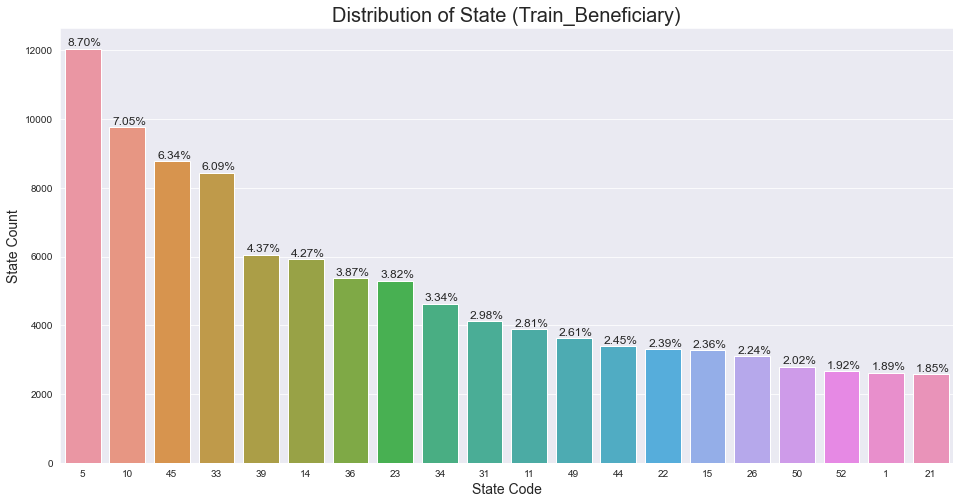

In [10]:
# Plot 20 negara bagian teratas dari tempat penerima manfaat berada
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=data2, orient ="v", order = data2['State'].value_counts().head(20).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, data2['State'], 0.05, 80,12)

### Pengamatan:
1. 20 negara bagian teratas dalam hal jumlah penerima manfaat ditunjukkan pada gambar di atas.
2. Negara bagian dengan kode 5, 10, 45, 33 dan 39 adalah 5 negara bagian teratas.
3. 8,7% penerima manfaat milik negara 5

### Plotting countplot Race/Ras di data penerima

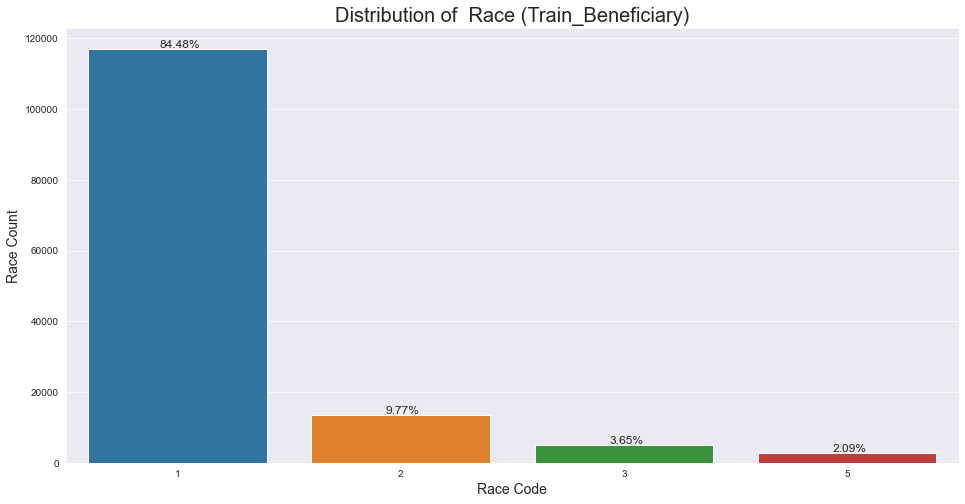

In [63]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=data2, orient ="v", order = data2['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Pengamatan:
1. Ras 1 adalah yang terbanyak dalam hal jumlah penerima manfaat.
2. 85% penerima termasuk ras 1.
3. Tidak ada ras 4 di dataset.

### Plot countplot NoOfMonths_PartACov untuk semua penerima manfaat

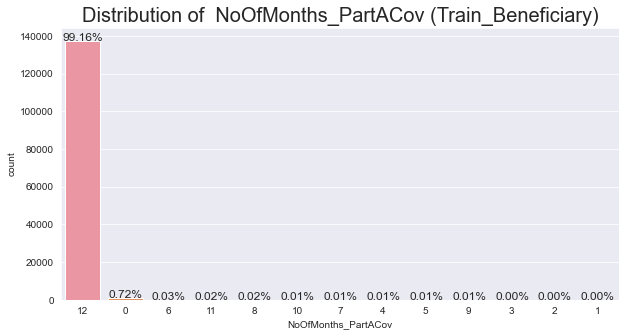

In [66]:
# Plot distribusi ras dalam data penerima manfaat
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Pengamatan:
1. 99% pasien di cover oleh provider A selama 12 bulan.

### Plot countplot NoOfMonths_PartBCov untuk semua penerima manfaat

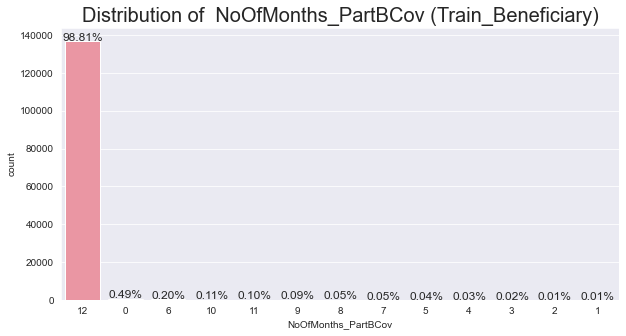

In [68]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. 98%  pasien di cover oleh provider B selama 12 bulan.

### Plot Scatterplot OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

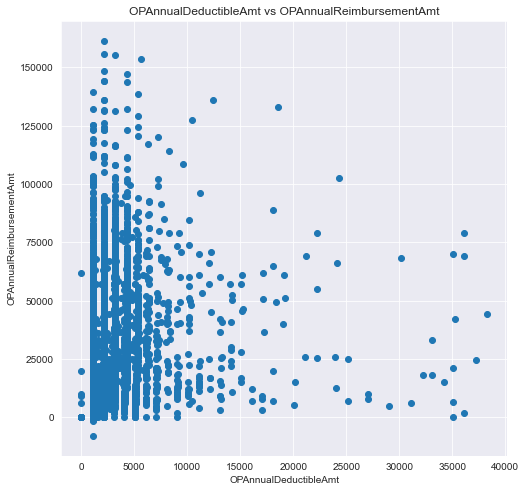

In [69]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(data2.IPAnnualDeductibleAmt, data2.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

### Pengamatan:
OPAnualDeductibleAmt menunjukkan jumlah yang dibayarkan/iuran oleh penerima setiap tahun untuk klaim rawat jalan dan OPAnualReimbursementAmt menunjukkan jumlah penggantian yang berhak diterima oleh penerima per tahun.

1. Untuk beberapa pasien Claim sangat tinggi tetapi iuran 0
2. Untuk beberapa pasien iuran sangat tinggi tetapi claim sangat rendah


### EDA Train_Inpatient/Test_Inpatient Data/Rawat inap

In [76]:
#Melihat column data 
data3.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


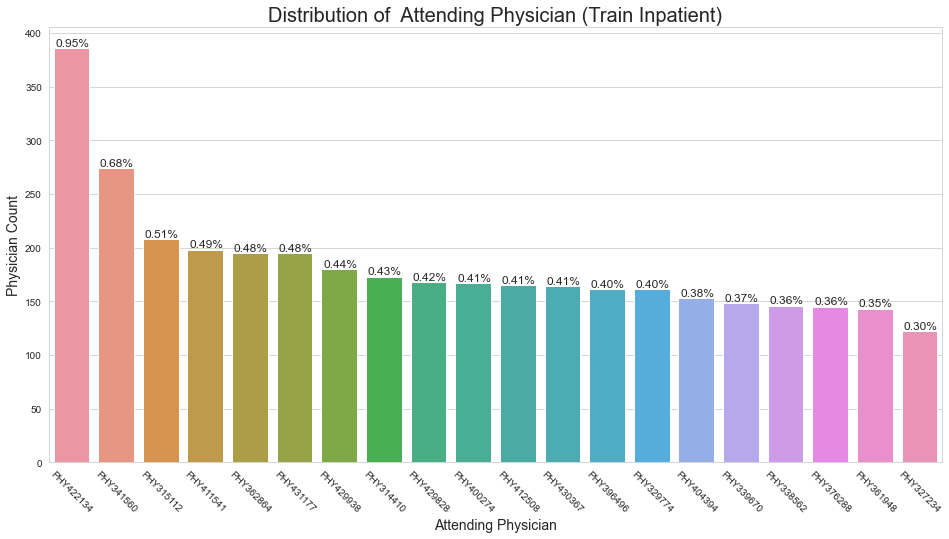

In [77]:
 # Plot top 20 Dokter yang Merawat dalam hal jumlah pasien yang dirawat
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=data3, orient ="v", order = data3['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['AttendingPhysician'], 0.02, 2, 12)

### Pengamatan:
1. PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 adalah 5 dokter yang merawat dalam hal jumlah kunjungan pasien.
2. PHY422134 merawat 1% dari total pasien.

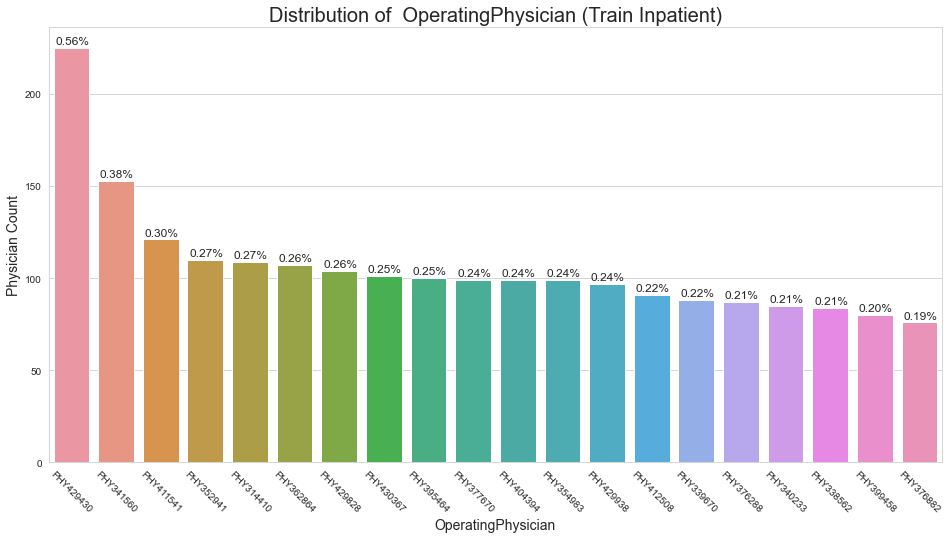

In [78]:
# Plot top 20 Dokter Operasi dalam hal jumlah pasien yang dioperasi
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=data3, orient ="v", order = data3['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OperatingPhysician'], 0.02, 2, 12)

### Pengamatan:
1. PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 adalah 5 dokter operasi teratas dalam hal jumlah operasi pasien.
2. PHY429430 mengoperasikan 0,56% dari total pasien.

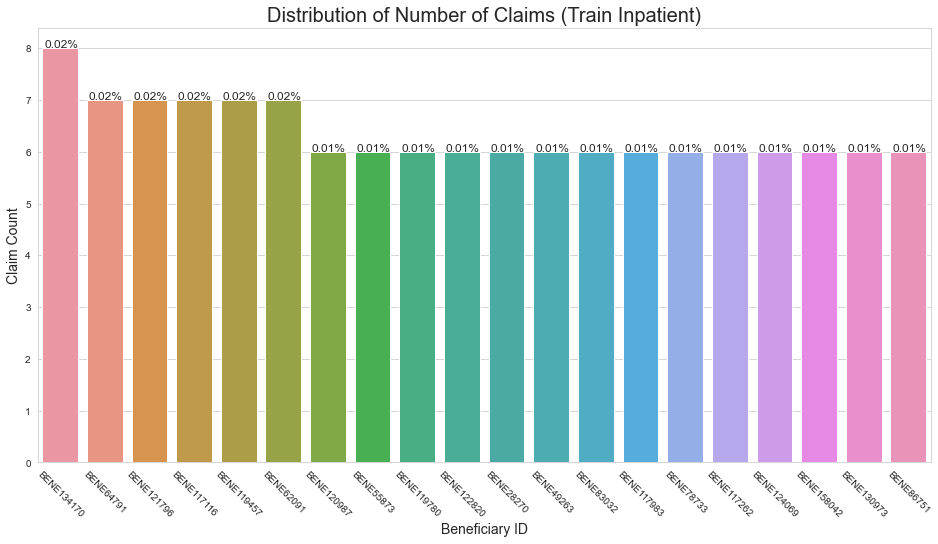

In [79]:
# Distribusi Jumlah Klaim pasian rawat inap
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=data3, orient ="v", order = data3['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['BeneID'], 0.02, 0.01, 12)

### Pengamatan:
1. BENE134170 mengklaim jumlah maksimal klaim rawat inap yaitu 8.
2. 5 penerima manfaat lainnya mengklaim 7 klaim, ditunjukkan dalam plot.

In [11]:
# convert ClaimStartDt, ClaimEndDt dari string ke datetime format
data3['ClaimStartDt'] = pd.to_datetime(data3['ClaimStartDt'] , format = '%Y-%m-%d')
data3['ClaimEndDt'] = pd.to_datetime(data3['ClaimEndDt'],format = '%Y-%m-%d')

datates3['ClaimStartDt'] = pd.to_datetime(datates3['ClaimStartDt'] , format = '%Y-%m-%d')
datates3['ClaimEndDt'] = pd.to_datetime(datates3['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt dari string ke datetime format
data3['AdmissionDt'] = pd.to_datetime(data3['AdmissionDt'] , format = '%Y-%m-%d')
data3['DischargeDt'] = pd.to_datetime(data3['DischargeDt'],format = '%Y-%m-%d')

datates3['AdmissionDt'] = pd.to_datetime(datates3['AdmissionDt'] , format = '%Y-%m-%d')
datates3['DischargeDt'] = pd.to_datetime(datates3['DischargeDt'],format = '%Y-%m-%d')

In [14]:
# Hitung Hospitalization_Duration = DischargeDt - AdmissionDt
data3['Hospitalization_Duration'] = ((data3['DischargeDt'] - data3['AdmissionDt']).dt.days)+1
# Hitung Claim_Period = ClaimEndDt - ClaimStartDt
data3['Claim_Period'] = ((data3['ClaimEndDt'] - data3['ClaimStartDt']).dt.days)+1

datates3['Hospitalization_Duration'] = ((datates3['DischargeDt'] - datates3['AdmissionDt']).dt.days)+1
datates3['Claim_Period'] = ((datates3['ClaimEndDt'] - datates3['ClaimStartDt']).dt.days)+1

### Jika jumlah hari yang diklaim untuk perawatan Rawat Inap >  tidak ada hari rawat inap, Peneliti anggap mencurigakan. Jadi, peneliti menambahkan kolom fitur ini.

In [15]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
data3['ExtraClaimDays'] = np.where(data3['Claim_Period']>data3['Hospitalization_Duration'], data3['Claim_Period'] - data3['Hospitalization_Duration'], 0)
datates3['ExtraClaimDays'] = np.where(datates3['Claim_Period']>datates3['Hospitalization_Duration'], datates3['Claim_Period'] - datates3['Hospitalization_Duration'], 0)

In [16]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Dapatkan bulan dan tahun awal klaim dan akhir klaim
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month

data3['ClaimEnd_Year'] = data3['ClaimEndDt'].dt.year
data3['ClaimEnd_Month'] = data3['ClaimEndDt'].dt.month
datates3['ClaimEnd_Year'] = datates3['ClaimEndDt'].dt.year
datates3['ClaimEnd_Month'] = datates3['ClaimEndDt'].dt.month

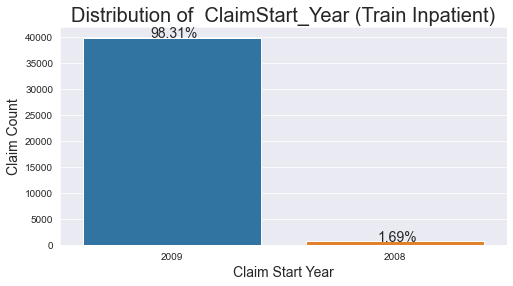

In [17]:
# Plot distribusi klaim mulai tahun dalam data Train Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=data3, orient ="v", order = data3['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, data3['ClaimStart_Year'], 0.01, 20,14)

### Pengamatan:
1. Untuk 98,3% klaim pasien dimulai pada tahun 2009.
2. Hanya 1,7% klaim yang dimulai pada tahun 2008

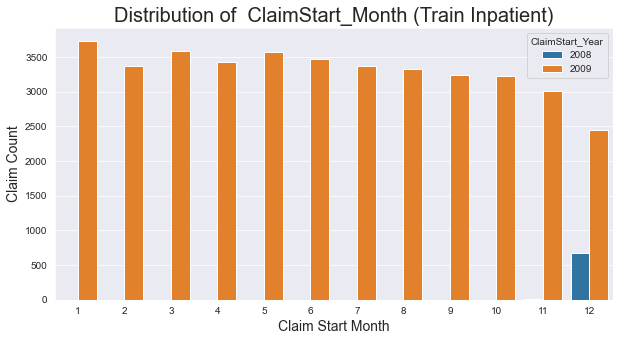

In [18]:
#Plot distribusi ClaimStart_Month pada data Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=data3, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatient['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Pengamatan:
1. Klaim hampir merata di semua bulan selama tahun 2009.
2. Klaim diamati hanya pada bulan Desember untuk tahun 2008. Artinya data dikumpulkan dari Des2008 sampai Des2009.

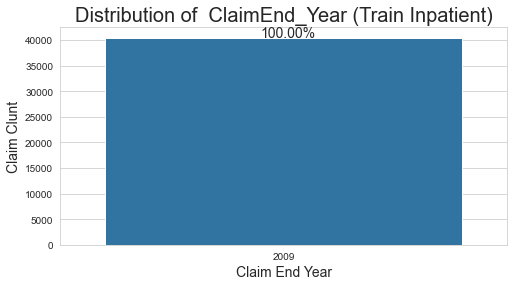

In [89]:
#Plot distribusi ClaimEnd_Year di Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=data3, orient ="v", order = data3['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Claim Clunt', size = 14)
percentage_without_hue(ax, data3['ClaimEnd_Year'], 0.01, 20,14)

### Pengamatan:
Semua klaim berakhir pada tahun 2009.

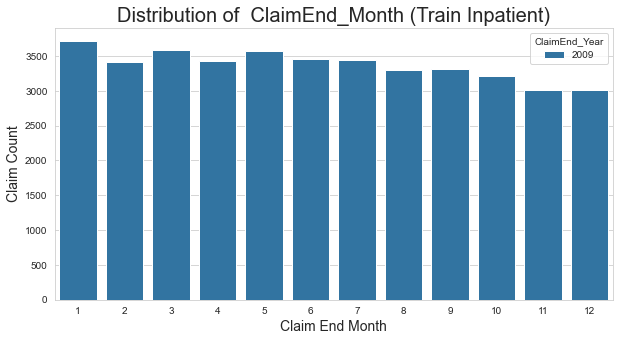

In [90]:
# Plot distribusi ClaimEnd_Month di Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=data3, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatient['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Pengamatan:
Semua klaim berakhir pada tahun 2009, didistribusikan di semua bulan.

In [19]:
# Convert bulan dan tahun Admission_Year dan Admission_Month
data3['Admission_Year'] = data3['AdmissionDt'].dt.year
data3['Admission_Month'] = data3['AdmissionDt'].dt.month
datates3['Admission_Year'] = datates3['AdmissionDt'].dt.year
datates3['Admission_Month'] = datates3['AdmissionDt'].dt.month

data3['Discharge_Year'] = data3['DischargeDt'].dt.year
data3['Discharge_Month'] = data3['DischargeDt'].dt.month
datates3['Discharge_Year'] = datates3['DischargeDt'].dt.year
datates3['Discharge_Month'] = datates3['DischargeDt'].dt.month

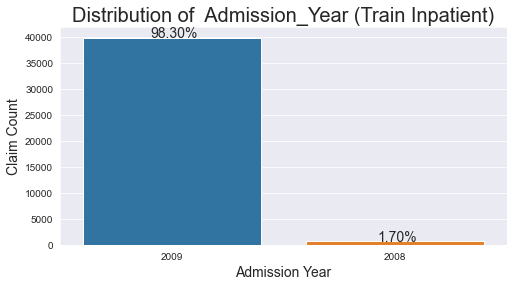

In [20]:
# Plot distribusi Penerimaan_Tahun di Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Admission_Year',y=None, data=data3, orient ="v", order = data3['Admission_Year'].value_counts().index)
plt.title('Distribution of  Admission_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admission Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, data3['Admission_Year'], 0.01, 20,14)

In [21]:
# Concat semuat  claim precedurecodes di 1 data 
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([data3["ClmProcedureCode_1"], 
                                   data3["ClmProcedureCode_2"],
                                   data3["ClmProcedureCode_3"],
                                   data3["ClmProcedureCode_4"], 
                                   data3["ClmProcedureCode_5"], 
                                   data3["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

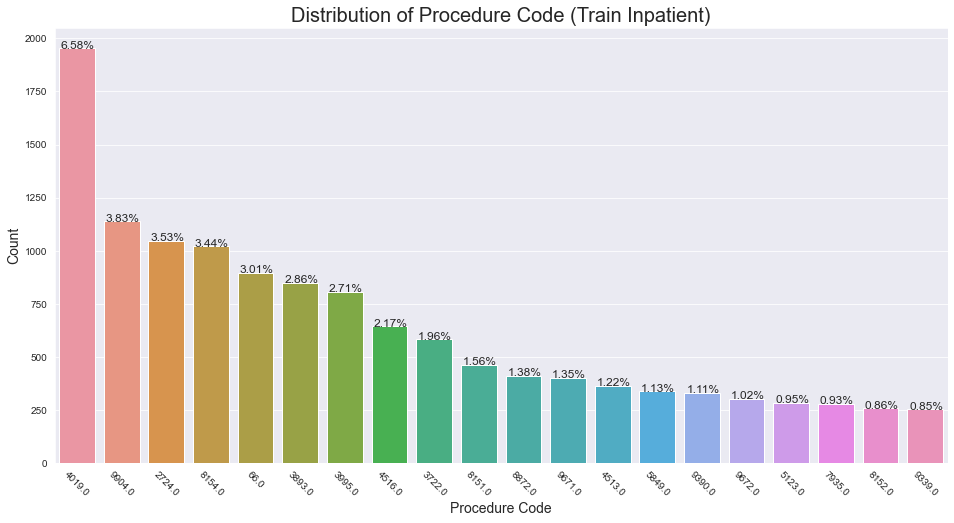

In [22]:
# Plot countplot untuk claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 4019, 9904, 2714, 8154, 66 adalah 5 prosedur teratas dalam hal jumlah prosedur.
2. Uji 4019 dilakukan 6,5% dari total prosedur.

In [23]:
# Concat semua column claim DiagnosisCodes
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([data3["ClmDiagnosisCode_1"], 
                                           data3["ClmDiagnosisCode_2"], 
                                           data3["ClmDiagnosisCode_3"], 
                                           data3["ClmDiagnosisCode_4"],
                                           data3["ClmDiagnosisCode_5"], 
                                           data3["ClmDiagnosisCode_6"],
                                           data3["ClmDiagnosisCode_7"],
                                           data3["ClmDiagnosisCode_8"],
                                           data3["ClmDiagnosisCode_9"],
                                           data3["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

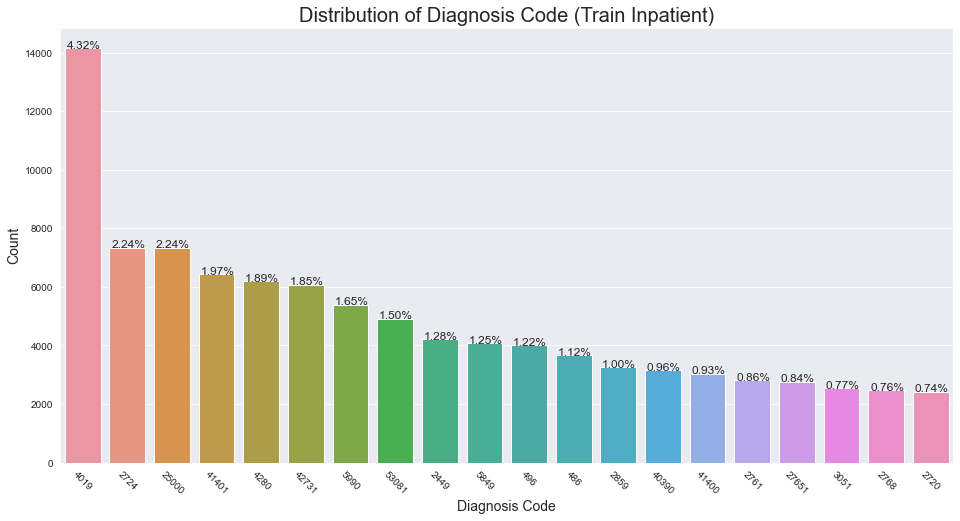

In [24]:
# Plot hitung untuk claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

## Pengamatan:
1. 4019, 2724, 25000, 41401, 4280 adalah 5 diagnosis teratas dalam hal jumlah diagnosis yang dilakukan.
2. Tes 4019 dilakukan 4,3% dari total diagnosis.

## EDA Train_Outpatient/Test_Outpatient / Rawat Jalan

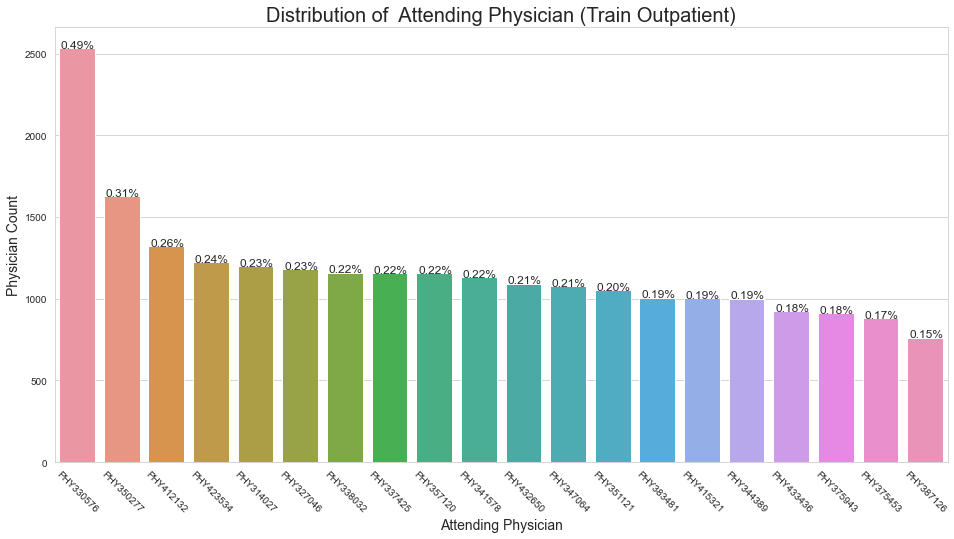

In [98]:
# Top 20 Pasien rawat jalan
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=data4, orient ="v", order = data4['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data4['AttendingPhysician'], 0.02, 2, 12)

### Pengamatan:
1. PHY330576, PHY350277, PHY412132, PHY423534, PHY314027 adalah 5 dokter yang merawat dalam hal jumlah kunjungan pasien.
2. PHY330576 merawat 0,5% dari total pasien.

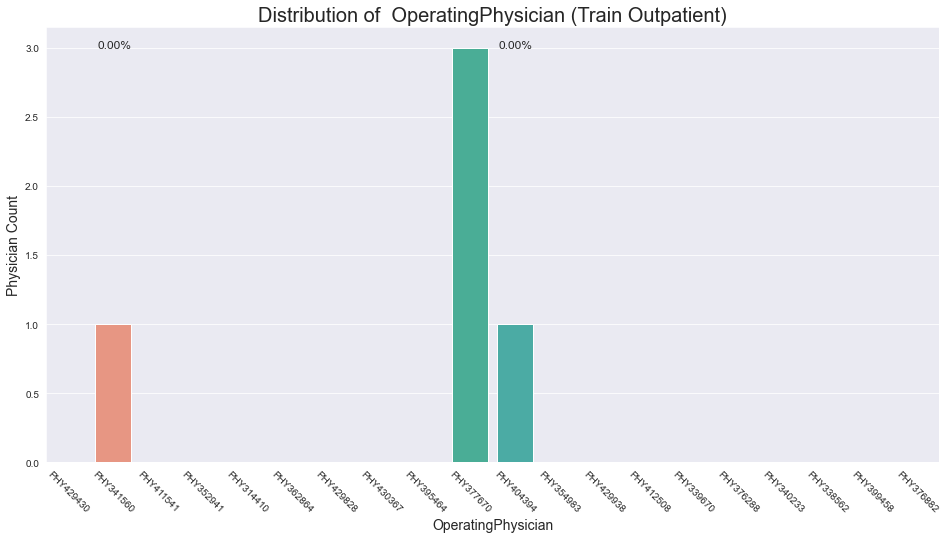

In [25]:
# Plot top 20 operasi dokter
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=data4, orient ="v", order = data3['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OperatingPhysician'], 0.02, 2, 12)

### Pengamatan:
1. PHY330576, PHY424897, PHY314027, PHY423534, PHY357120 adalah 5 dokter operasi teratas dalam hal jumlah operasi pasien.
2. PHY330576 mengoperasikan 0,08% dari total pasien.

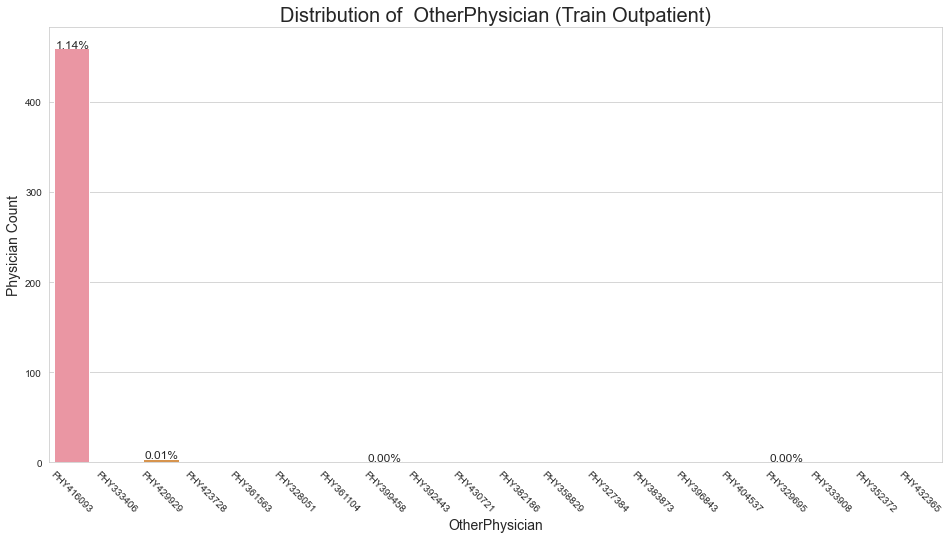

In [101]:
# Plot top 20 Dokter Lain dalam hal jumlah pasien yang dirawat
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=data4, orient ="v", order = data3['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OtherPhysician'], 0.02, 0, 12)

### Pengamatan:
1. PHY412132, PHY341578, PHY338032, PHY337425, PHY347064 adalah 5 dokter teratas lainnya dalam hal jumlah kunjungan pasien

In [27]:
# convert ClaimStartDt, ClaimEndDt dari string ke datetime format
data4['ClaimStartDt'] = pd.to_datetime(data4['ClaimStartDt'] , format = '%Y-%m-%d')
data4['ClaimEndDt'] = pd.to_datetime(data4['ClaimEndDt'],format = '%Y-%m-%d')

datates4['ClaimStartDt'] = pd.to_datetime(datates4['ClaimStartDt'] , format = '%Y-%m-%d')
datates4['ClaimEndDt'] = pd.to_datetime(datates4['ClaimEndDt'],format = '%Y-%m-%d')

In [28]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# convert months and year dari claim start dan claim end
data4['ClaimStart_Year'] = data4['ClaimStartDt'].dt.year
data4['ClaimStart_Month'] = data4['ClaimStartDt'].dt.month
datates4['ClaimStart_Year'] = datates4['ClaimStartDt'].dt.year
datates4['ClaimStart_Month'] = datates4['ClaimStartDt'].dt.month

data4['ClaimEnd_Year'] = data4['ClaimEndDt'].dt.year
data4['ClaimEnd_Month'] = data4['ClaimEndDt'].dt.month
datates4['ClaimEnd_Year'] = datates4['ClaimEndDt'].dt.year
datates4['ClaimEnd_Month'] = datates4['ClaimEndDt'].dt.month

In [105]:
# kalkulasi Claim_Period = ClaimEndDt - ClaimStartDt
data4['Claim_Period'] = ((data4['ClaimEndDt'] - data4['ClaimStartDt']).dt.days)+1

datates4['Claim_Period'] = ((datates4['ClaimEndDt'] - datates4['ClaimStartDt']).dt.days)+1

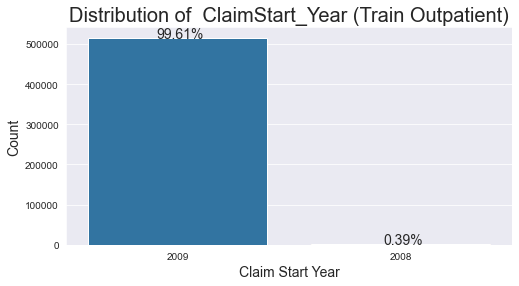

In [29]:
# Plot distribusi klaim mulai tahun dalam data Train Rawat Jalan
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=data4, orient ="v", order = data4['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimStart_Year'], 0.01, 20,14)

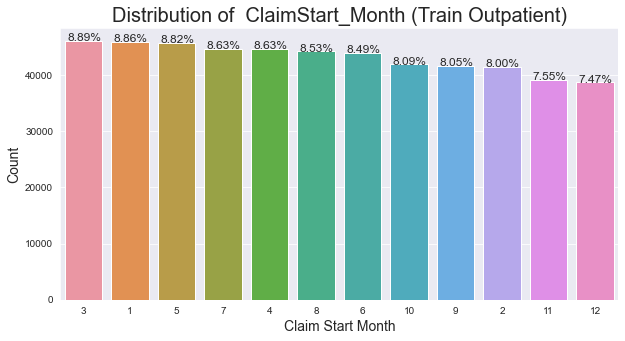

In [30]:
# Plot distribusi ClaimStart_Month pada data Latih Rawat Inap
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=data4, orient ="v", order = data4['ClaimStart_Month'].value_counts().index)
plt.title('Distribution of  ClaimStart_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimStart_Month'], 0.01, 20,12)

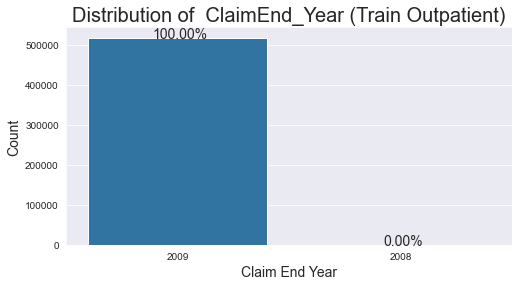

In [31]:
# Plot distribusi ClaimEnd_Year dalam data Train_Outpatient
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=data4, orient ="v", order = data4['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimEnd_Year'], 0.01, 20,14)

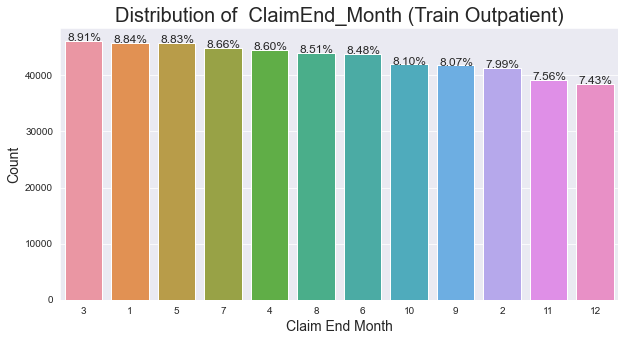

In [32]:
# Plot distribusi ClaimEnd_Month dalam data Train_Outpatient
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=data4, orient ="v", order = data4['ClaimEnd_Month'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimEnd_Month'], 0.01, 20,12)

### Pengamatan:
1. 99,6% klaim dimulai tahun 2009 hanya 0,4% klaim dimulai tahun 2008
2. Penyaluran tahun mulai klaim seragam.
3. Semua klaim berakhir pada tahun 2009, didistribusikan di semua bulan.

In [34]:
# Concat semua data claim precedurecodes
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([data4["ClmProcedureCode_1"], 
                                   data4["ClmProcedureCode_2"],
                                   data4["ClmProcedureCode_3"],
                                   data4["ClmProcedureCode_4"], 
                                   data4["ClmProcedureCode_5"], 
                                   data4["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

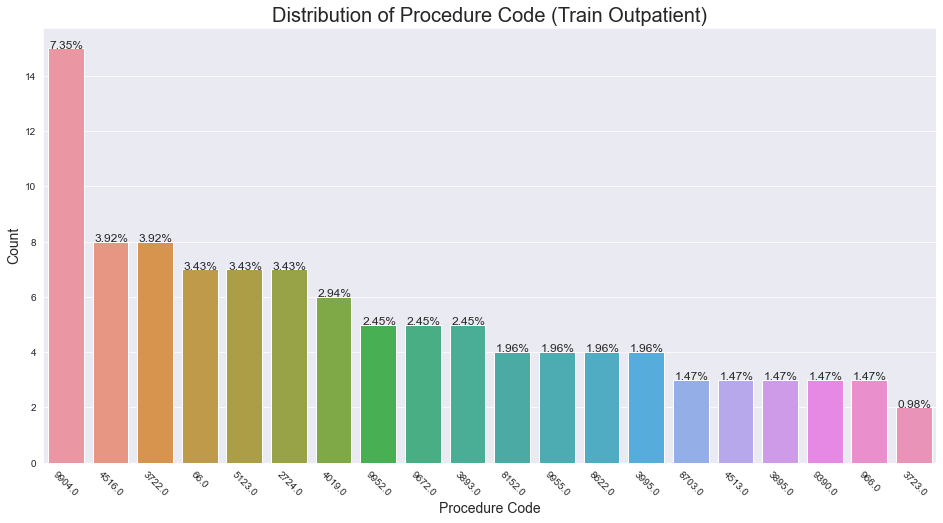

In [35]:
# countplotclaim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Outpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 20 Kode Prosedur Teratas ditampilkan di plot.
2. Prosedur 9904 selesai 7,35% dari total prosedur selesai.

In [36]:
# Concat semua claim DiagnosisCodes
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([data4["ClmDiagnosisCode_1"], 
                                           data4["ClmDiagnosisCode_2"], 
                                           data4["ClmDiagnosisCode_3"], 
                                           data4["ClmDiagnosisCode_4"],
                                           data4["ClmDiagnosisCode_5"], 
                                           data4["ClmDiagnosisCode_6"],
                                           data4["ClmDiagnosisCode_7"],
                                           data4["ClmDiagnosisCode_8"],
                                           data4["ClmDiagnosisCode_9"],
                                           data4["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

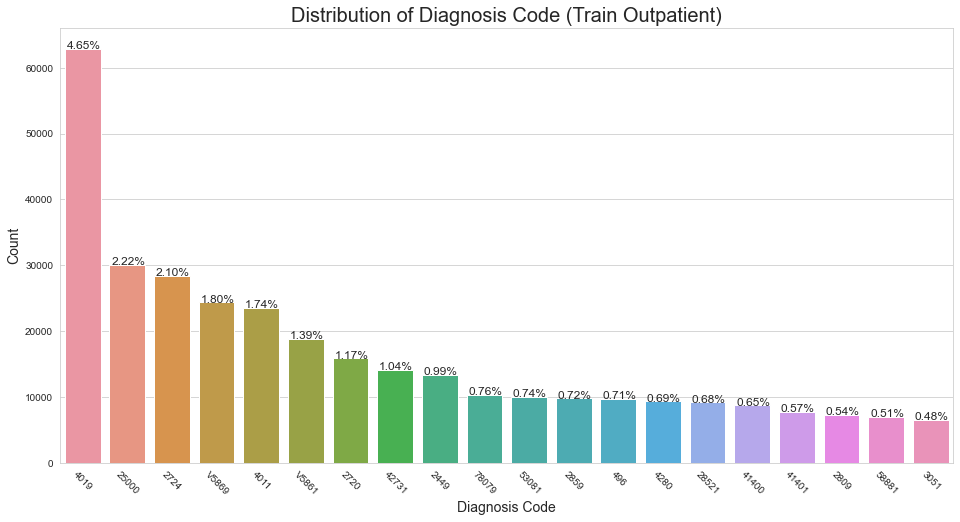

In [113]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 20 code Diagnosis Teratas ditampilkan di plot.


## 5 - MERGE DATASET DAN  FEATURE SELECTION

In [37]:
#Menampilkan column rawat jalan
data4.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month'],
      dtype='object')

In [38]:
# membuat columns rawat jalan dan rawat inap 
data3['Inpatient_or_Outpatient'] = 1
data4['Inpatient_or_Outpatient'] = 0
datates3['Inpatient_or_Outpatient'] = 1
datates4['Inpatient_or_Outpatient'] = 0

### Merge Inpatient and Outpatient Data
 Peneliti menggabungkan data pasien rawat inap dan pasian rawat jalan

In [42]:
# Merge inpatient dan outpatient 
common_columns = [ columns for columns in data4.columns if columns in data3.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(data3, data4, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Inpatient_or_Outpatient']


In [43]:
# Merge beneficiary dengan rawat inap dan rawat jalan pasien
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, data2,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge dengan data train
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, data1 , how = 'inner', on = 'Provider' )

In [44]:
# # Merge inpatient dan outpatient tes

common_columns_test = [ columns for columns in datates4.columns if columns in datates3.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(datates4, datates3, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, datates2,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, datates1 , how = 'inner', on = 'Provider' )

In [45]:
Final_Dataset_Train.shape

(558211, 67)

In [122]:
Final_Dataset_Train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Birth_Year,Birth_Month,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7,0.0,2009,4,2009,4,2009.0,4.0,2009.0,4.0,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1943,1,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2009,9,2009,9,NaN,NaN,NaN,NaN,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,1932,5,Yes


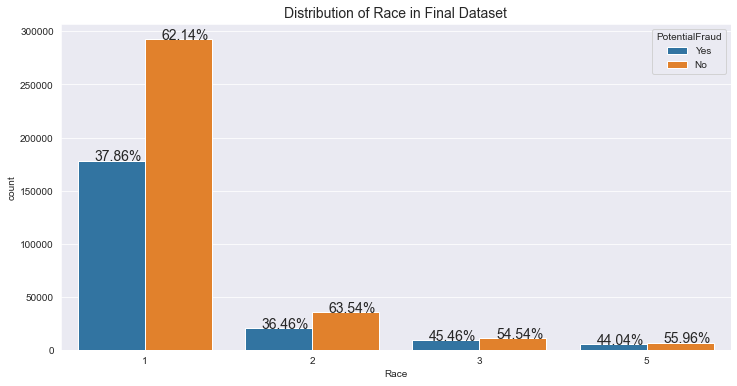

In [46]:
# distribusi race di datset baru dengan label target
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 14)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

### Pengamatan:
1. Total jumlah transaksi lebih banyak untuk Race 1, 37,8% di antaranya adalah penipuan.
2. Rasio penipuan transaksi terbanyak pada Race 3 (45,5%)
3. Jadi, feature ras/race merupakan fitur penting dalam deteksi penipuan.

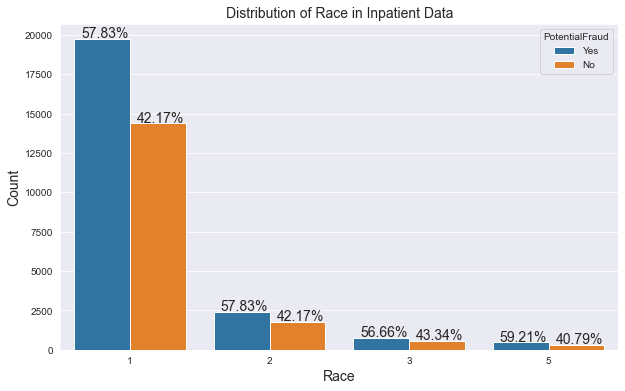

In [48]:
 # distribusi race di pasien rawat inap
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 1]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,80, 14)

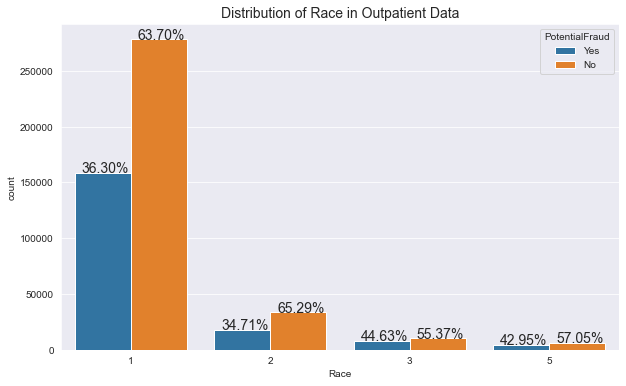

In [49]:
# distribusi race di pasien rawat jalan
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Outpatient Data', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,200, 14)

### Pengamatan:
1. Ketika data rawat inap dan rawat jalan dianalisis secara terpisah terlihat bahwa persentase aktivitas penipuan lebih banyak terjadi pada Data Rawat Inap dibandingkan dengan Data Rawat Jalan. Ini mungkin karena lebih banyak uang yang terkait dengan klaim rawat inap.
2. Pada data Rawat Inap, Ras 5 memiliki persentase aktivitas penipuan tertinggi (59,21%)
3. Pada data rawat jalan Ras 3 memiliki persentase aktivitas penipuan tertinggi (44,63%)

In [50]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims     

40474

In [51]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))

Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [52]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))

Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [129]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


### Pengamatan:
1. Persentase kecurangan lebih banyak pada data rawat inap hal ini dikarenakan rata-rata jumlah penggantian (10.088) untuk data rawat inap 35 kali lipat dari rata-rata jumlah penggantian (286) untuk rawat jalan.
2. Jumlah 295.681.120 terbuang untuk transaksi penipuan yaitu 53% dari total jumlah penggantian (556.543.140)

In [53]:
# Concat all the claim precedurecodes
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

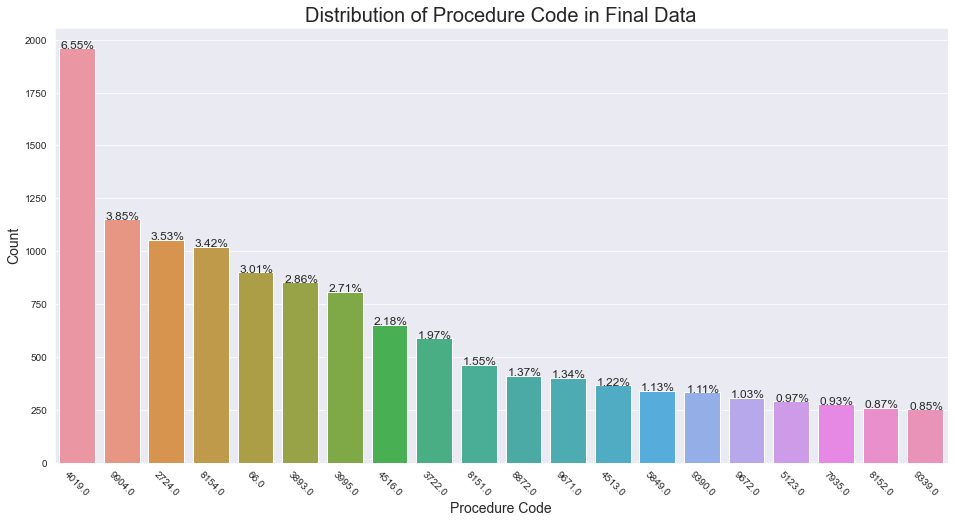

In [54]:
# claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_df, orient ="v", order = ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Final Data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_df['ProcedureCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 20 kode prosedur teratas ditampilkan di plot.
2. Uji 4019 dilakukan 6,5% dari total prosedur.

In [55]:
# Concat claim DiagnosisCodes
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

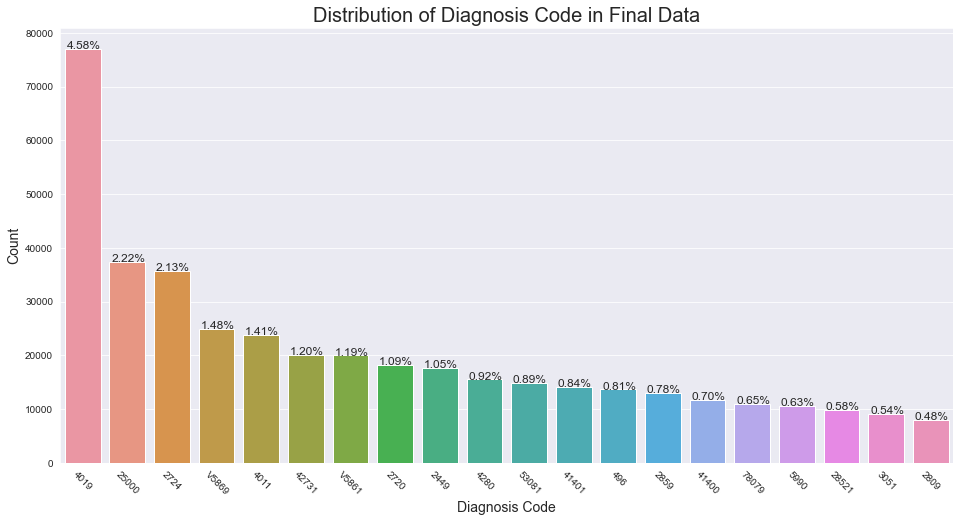

In [56]:
# countplot  claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_df, orient ="v", order = ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code in Final Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_df['DiagnosisCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 20 kode diagnosis teratas ditampilkan di plot.
2. 4019 diagnosis dilakukan 4,5% dari total diagnosis.

In [57]:
# hanya di froud yes saja
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

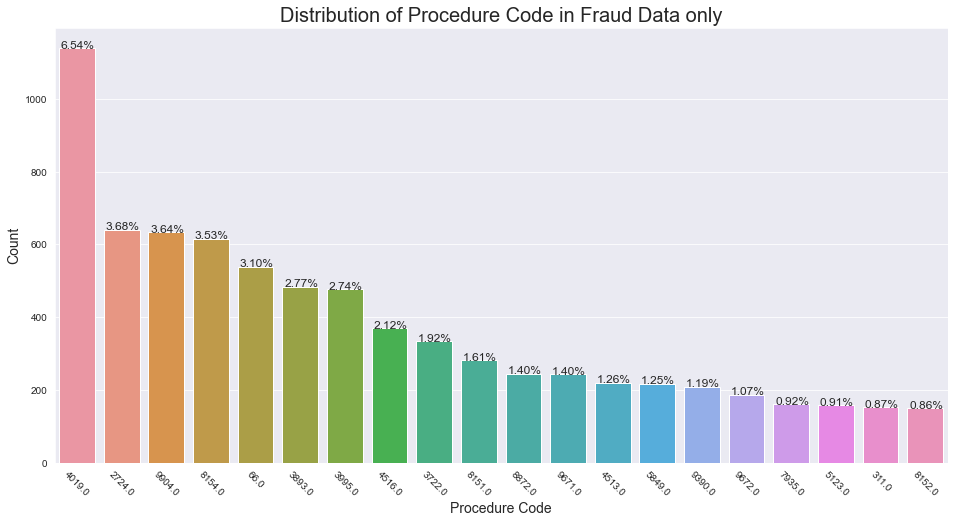

In [58]:
# countplot  claim diagnosis codes (Top 20) di fraud data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Fraud Data only', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)

### Pengamatan:
1. 20 kode diagnosis teratas hanya untuk data penipuan yang ditampilkan di plot.
2. 4019 diagnosis dilakukan 6,5% dari total diagnosis fraud.

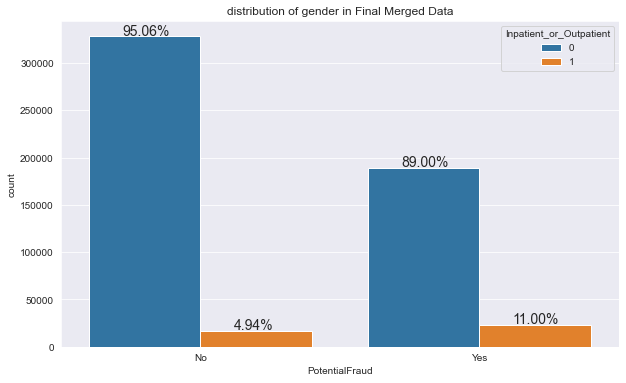

In [59]:
# Plot distribution gender di Final Merged Data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Final_Dataset_Train, hue = 'Inpatient_or_Outpatient', order = Final_Dataset_Train['PotentialFraud'].value_counts().index)
plt.title('distribution of gender in Final Merged Data')
percentage_with_hue(ax, Final_Dataset_Train['PotentialFraud'], 2,2,-0.08,1000, 14)

### Pengamatan:
1. Dari total aktivitas penipuan, 89% berasal dari klaim rawat jalan dan 11% dari klaim rawat inap dalam hal jumlah klaim.

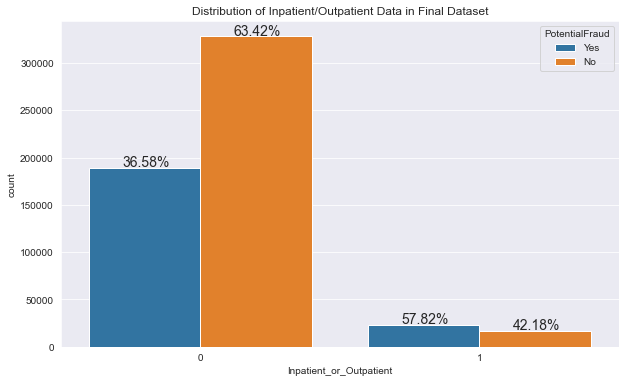

In [60]:
# Plot distribusi gender dalam column penerima asuransi
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Inpatient_or_Outpatient',data=Final_Dataset_Train, hue = 'PotentialFraud', order = Final_Dataset_Train['Inpatient_or_Outpatient'].value_counts().index)
plt.title('Distribution of Inpatient/Outpatient Data in Final Dataset')
percentage_with_hue(ax, Final_Dataset_Train['Inpatient_or_Outpatient'], 2,2,-0.08,1000, 14)

### Pengamatan:
1. Jumlah klaim untuk data rawat inap lebih sedikit dibandingkan data rawat jalan.
2. Meskipun klaim lebih sedikit pada data rawat inap, persentase aktivitas penipuan lebih banyak pada data rawat inap (57,8%) sedangkan pada data rawat jalan 36,5%. Hal ini dikarenakan jumlah penggantian per klaim untuk rawat inap jauh lebih tinggi dibandingkan jumlah penggantian per klaim rawat jalan.

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


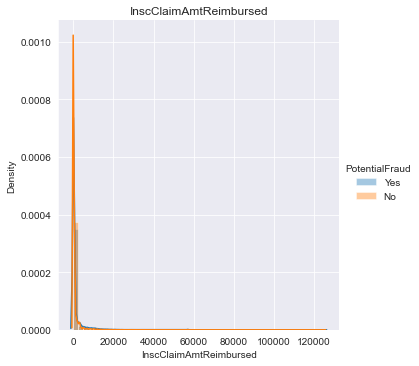

In [61]:
#Histogram InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", size=5) \
   .map(sns.distplot, "InscClaimAmtReimbursed") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


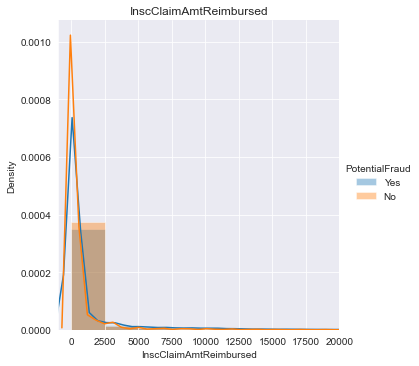

In [62]:
#Histogram InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", size=5) \
   .map(sns.distplot, "InscClaimAmtReimbursed") \
   .add_legend();
plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

### Pengamatan:
1. Dari  histogram jumlah klaim yang diganti dapat kita amati bahwa ketika jumlah klaim lebih sedikit, jumlah klaim penipuan jauh lebih tinggi dibandingkan dengan klaim yang sah.
2. Untuk jumlah penipuan yang lebih tinggi juga sedikit lebih tinggi.

In [64]:
# buat fitur baru jumlah penggantian total untuk rawat inap dan rawat jalan
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# membuat fitur baru jumlah penarikan total untuk rawat inap dan rawat jalan
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


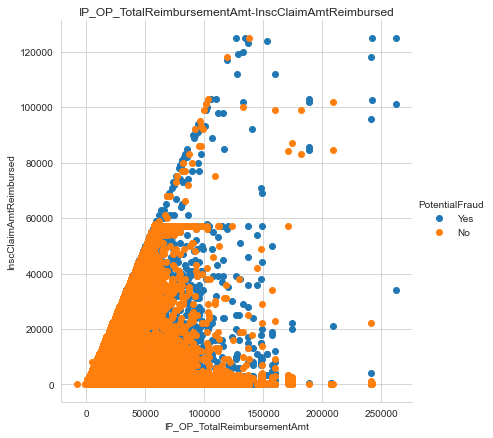

In [65]:
#Scatter Plot- IP_OP_TotalReimbursementAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', size=6)\
    .map(plt.scatter, "IP_OP_TotalReimbursementAmt", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('IP_OP_TotalReimbursementAmt-InscClaimAmtReimbursed')
plt.show();

### Pengamatan:
1. Jika InscClaimAmtReimbursed>10000 dan IP_OP_TotalReimbursementAmt>120000 maka peluang transaksi penipuan tinggi.

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


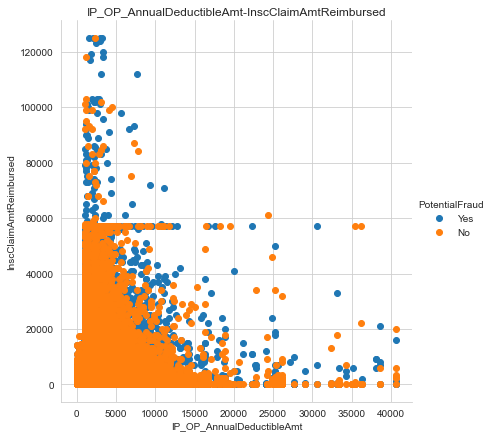

In [149]:
#Scatter Plot- IP_OP_AnnualDeductibleAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', size=6)\
    .map(plt.scatter, "IP_OP_AnnualDeductibleAmt", "InscClaimAmtReimbursed")\
    .add_legend()
plt.title('IP_OP_AnnualDeductibleAmt-InscClaimAmtReimbursed')
plt.show()

### Pengamatan:
1. Jika InscClaimAmtReimbursed>600000 dan IP_OP_AnnualDeductibleAmt<5000 maka peluang transaksi penipuan tinggi.

In [66]:
#melihat column final train dataset
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [67]:
#Melihat Head dataset
Final_Dataset_Train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,2009,4,2009,4,2009.0,4.0,2009.0,4.0,1,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,36060,3274
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,9,2009,9,NaN,NaN,NaN,NaN,0,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes,24450,2336


## Handling Missing Value

In [68]:
# https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
# mencari missing value
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'Claim_Period',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

1. 'AttendingPhysician','OperatingPhysician','OtherPhysician', yang semuanya NaN akan saya isi dengan Nol.
2. Missing diagnosis code dan procedure codes yang hilang juga akan saya isi dengan Nol
3. Tanggal dan periode masuk tidak berlaku untuk data rawat jalan, diisi dengan nol.
4. DOD tidak dipakai.
5. jadi kesimpulannya peneliti akan merubah missing value menjadi 0

In [70]:
## Isi hasil yang hilang menggunakan 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [71]:
#cek dataset
Final_Dataset_Train.isna().sum().sum()

0

In [72]:
#cek dataset
Final_Dataset_Test.isna().sum().sum()

0

data null sudah hilang dari dataset

## 6- Feature Engineering

In [74]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

Saat Provider mengisi dan mengajukan klaim, mereka sebagian besar terkait dengan aktivitas penipuan. Jadi, saya akan mengelompokkan berdasarkan penyedia dan mengambil rata-rata penggantian, pengurangan, dll. Jika rata-rata jumlah klaim atau periode klaim tinggi untuk penyedia, ini mencurigakan

In [75]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period


penerima juga terkait dengan aktivitas penipuan. Jadi, kelompokkan berdasarkan kerangka data berdasarkan Id Penerima dan ambil Mean. Jika jumlah klaim rata-rata tinggi untuk penerima, maka ini mencurigakan.

In [76]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period


Dokter juga terkait dengan aktivitas penipuan. Jadi, kelompokkan berdasarkan AttendingPhysician, OperatingPhysician dan OtherPhysician dan hitung MEAN. Jumlah yang tinggi bagi seorang dokter mencurigakan.

In [78]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period


In [79]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')

PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Hospitalization_Duration
PerOperatingPhysician_mean_Claim_Period


In [80]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period',]

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')

PerOtherPhysician_mean_InscClaimAmtReimbursed
PerOtherPhysician_mean_DeductibleAmtPaid
PerOtherPhysician_mean_IPAnnualReimbursementAmt
PerOtherPhysician_mean_IPAnnualDeductibleAmt
PerOtherPhysician_mean_OPAnnualReimbursementAmt
PerOtherPhysician_mean_OPAnnualDeductibleAmt
PerOtherPhysician_mean_Hospitalization_Duration
PerOtherPhysician_mean_Claim_Period


peneliti akan mengelompokkan berdasarkan semua kode diagnosis untuk menggabungkan pasien yang melakukan tes yang sama dan mengambil biaya rata-rata, dll.

In [81]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')

PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Hospitalization_Duration
PerDiagnosisGroupCode_mean_Claim_Period


In [82]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration
PerClmAdmitDiagnosisCode_mean_Claim_Period


peneliti juga akan mengelompokkan berdasarkan semua kode prosedur untuk menggabungkan pasien yang menjalani prosedur yang sama, mengambil rata-rata biaya, dll.

In [83]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')

PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Hospitalization_Duration
PerClmProcedureCode_1_mean_Claim_Period


In [84]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')

PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Hospitalization_Duration
PerClmProcedureCode_2_mean_Claim_Period


In [85]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')

PerClmProcedureCode_3_mean_InscClaimAmtReimbursed
PerClmProcedureCode_3_mean_DeductibleAmtPaid
PerClmProcedureCode_3_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_Hospitalization_Duration
PerClmProcedureCode_3_mean_Claim_Period


In [86]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')

PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Hospitalization_Duration
PerClmProcedureCode_4_mean_Claim_Period


In [87]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')

PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [88]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid
PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [89]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')

PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_1_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_Hospitalization_Duration
PerClmDiagnosisCode_1_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [90]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')

PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_Hospitalization_Duration
PerClmDiagnosisCode_2_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [91]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')

PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [92]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')

PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_Hospitalization_Duration
PerClmDiagnosisCode_4_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [93]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')

PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [94]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')

PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_Hospitalization_Duration
PerClmDiagnosisCode_6_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [95]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


Terkadang Penyedia bersama dengan dokter, penerima dan terkadang diagnosis dan prosedur juga terkait. Jadi ambil fitur lain dengan provider id dan gruop by. Hitung setelah itu.

In [96]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')

PerProviderBeneID_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderAttendingPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOtherPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOperatingPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmAdmitDiagnosisCode_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_1_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_2_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_3_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_4_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_5_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_1_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_2_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_3_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_4_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_5_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_6_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderDiagnosisGroupCode_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_12360\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [97]:
Final_Dataset_Train.columns[:80]

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [98]:
Final_Dataset_Train.shape

(558211, 241)

In [99]:
Final_Dataset_Test.shape

(135392, 240)

### Penjelasan
shape menjadi banyak karena peneliti melakukan feature engineering denga menambah columns baru yang berisi rata-rata setiap column, tujuan dan harapannya agar model lebih bagus untuk memprediksinnya

### Hapus Column yang sudah dibuat column baru dengan feature engineer

In [102]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [104]:
#Menampilkan data set
Final_Dataset_Train_FE.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode

In [105]:
#Mendefiniskan dataset dan grupby provider dengan potensial froud di train
final_train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
final_test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')

In [108]:
#cek shape
final_train.shape

(5410, 201)

In [109]:
#cek shape
final_test.shape

(1353, 200)

In [110]:
#cek datasettrain
final_train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,P

In [111]:
#cek dataset
final_test.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Inpatient_or_Outpatient,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,PerClmProcedureC

## 6 - Data Preprocessing Untuk Modeling
Bagian ini berisi tentang proses penyiapan data untuk proses pelatihan model, seperti membagi data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll), dan proses-proses lain yang diperlukan.

### Buat model inference
Dengan Tujuan pengetesan model yang sudah di training dengan data actual

In [112]:
## buat data inference
data_inf = final_train.sample(20, random_state=30)
data_inf

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,P

In [113]:
# ambil data dari final train
final_train = final_train.drop(data_inf.index)
final_train

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,P

In [114]:
#Rapihkan index di data inference dan data train
final_train.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,P

## Splitting between X (Features) and y (Target)

In [115]:
# pisah kan data menjadi x train ,y_train dan x_test
X_train = final_train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = final_train['PotentialFraud']
X_test = final_test.drop(axis=1,columns=['Provider'])

In [116]:
#Cek dataset yang sudah dipisah
X_train.head(3)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_1_mean_Hospitalization_Duration,PerClmProcedureCode_1_mean_Claim_Period,PerClmProcedureCode_2_mean_InscClaimAmtReimbursed,PerClmProcedureCode_2_mean_DeductibleAmtPaid,PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt,PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt,PerClmProcedureCode_2_mean_Hospitalization_Duration,PerClmProcedureCode_2_mean_Claim_Period,PerClmProcedureCode_3_mea

Dikarenakan untuk dataset tes tidak ada target , jadi peneliti tidak memakai atau membuat y_test

## Mencari Numerical Columns dan Kategori

In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer


num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Mengidentifikasi fitur numerik dengan skewness <= 0.5
num_normal = []
num_skew = []
for col in num_columns:
    if X_train[col].skew() <= 0.5:
        num_normal.append(col)
    else:
        num_skew.append(col)

Membuat dan memasukan skew data kedalam num_skew dan normal data distribusi ke num_normal, keperluan ini untuk scaling pada saat penggunaan pipline

In [120]:
# Melakukan transformasi pada fitur numerik yang skewness-nya tinggi
pt = PowerTransformer()
X_num_skew = pt.fit_transform(X_train[num_skew])

# Menggabungkan fitur kategorikal dan fitur numerik yang telah di-transformasi
X_train = pd.concat([X_train[cat_columns], pd.DataFrame(X_num_skew, columns=num_skew), X_train[num_normal]], axis=1)

Peneliti memakai method PowerTransformer() data num yang skew tinggi

## Pipeline

In [121]:
#divide num by skew and normal, cat by ordinal and none
num_normal = num_normal
num_skew = num_skew
cat_ord = cat_columns

In [122]:
#persiapkan column transformer untuk membedakan proses per kolom
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder

preprocess = ColumnTransformer([
    ('numnormal', StandardScaler(),num_normal),
    ('numskew', MinMaxScaler(),num_skew),
    ('catord', OrdinalEncoder(),cat_ord)
  ])

In [123]:
# Fit and Transform
X_train_pipline = preprocess.fit_transform(X_train)
X_test_pipline = preprocess.transform(X_test)
X_train_pipline.shape

(5390, 199)

## Encoding Y target
dikarenakan bentuk dari target kita categorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [124]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [125]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [126]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)

In [127]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['PotentialFraud'])

In [128]:
y_train_enc.head(2)

,PotentialFraud
0,0
1,1


In [129]:
y_train_enc.shape

(5390, 1)

In [130]:
y_train_enc = np.ravel(y_train_enc)

In [131]:
y_train_enc.shape

(5390,)

## 7 - Model Definition
Disini akan melakukan dengan model

1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. Gradient Boosting

In [132]:
#mendefinisikan model
lr= LogisticRegression()
SVC_model = SVC()
dtmod= DecisionTreeClassifier()
ranfor= RandomForestClassifier()
knmod= KNeighborsClassifier()
naivbay= GaussianNB()
gb_clf = GradientBoostingClassifier()

## 8 - Model Training

In [133]:
#Logistic Regression
%timeit lr.fit(X_train_pipline, y_train_enc)
#SVM
%timeit SVC_model.fit(X_train_pipline, y_train_enc)
#Decision Tree
%timeit dtmod.fit(X_train_pipline, y_train_enc)
#Random Forest
%timeit ranfor.fit(X_train_pipline, y_train_enc)
#KNN
%timeit knmod.fit(X_train_pipline, y_train_enc)
#Naive Bayes
%timeit naivbay.fit(X_train_pipline, y_train_enc)
#Gradient Boosting
%timeit gb_clf.fit(X_train_pipline, y_train_enc)

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

294 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.37 s ± 54.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.09 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.06 s ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.87 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.9 ms ± 554 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.6 s ± 312 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 9 - Model Evaluation

In [134]:
#Define variable untuk memakai Cross_val_score
scoreslr = cross_val_score(lr, X_train_pipline, y_train_enc,cv=5)
scores_SVC = cross_val_score(SVC_model, X_train_pipline, y_train_enc,cv=5)
scores_dectre = cross_val_score(dtmod, X_train_pipline, y_train_enc,cv=5)
scores_ranfor = cross_val_score(ranfor, X_train_pipline, y_train_enc,cv=5)
scores_knmod = cross_val_score(knmod, X_train_pipline, y_train_enc,cv=5)
scores_naivbay = cross_val_score(naivbay, X_train_pipline, y_train_enc,cv=5)
scores_gb_clf = cross_val_score(gb_clf, X_train_pipline, y_train_enc,cv=5)


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [145]:
#memakai method mean() untuk mencari mean
print('LogisticRegression score', scoreslr.mean())
print('SVC score',scores_SVC.mean())
print('DecisionTreeClassifier score',scores_dectre.mean())
print('RandomForestClassifier score',scores_ranfor.mean())
print('KNeighborsClassifier score',scores_knmod.mean())
print('GaussianNB score',scores_naivbay.mean())
print('GradientBoostingClassifier score',scores_gb_clf.mean())



LogisticRegression score 0.9337662337662337
SVC score 0.9337662337662337
DecisionTreeClassifier score 0.9077922077922078
RandomForestClassifier score 0.928200371057514
KNeighborsClassifier score 0.9272727272727274
GaussianNB score 0.7931354359925787
GradientBoostingClassifier score 0.9332096474953617


In [146]:
#membuat dict untuk mengetahui nilai tertinggi
scores = {
    'LogisticRegression': scoreslr.mean(),
    'SVC': scores_SVC.mean(),
    'DecisionTreeClassifier': scores_dectre.mean(),
    'RandomForestClassifier': scores_ranfor.mean(),
    'KNeighborsClassifier': scores_knmod.mean(),
    'GaussianNB': scores_naivbay.mean(),
    'GradientBoostingClassifier': scores_gb_clf.mean()
}

max_score = max(scores.values())

for model, score in scores.items():
    if score == max_score:
        print(f"Nilai Score Tertinggi dengan metode Validation score adalah: {model} = {score}")


Nilai Score Tertinggi dengan metode Validation score adalah: LogisticRegression = 0.9337662337662337
Nilai Score Tertinggi dengan metode Validation score adalah: SVC = 0.9337662337662337


In [148]:
#memakai method mean() untuk mencari std
print('LogisticRegression score', scoreslr.std())
print('SVC score',scores_SVC.std())
print('DecisionTreeClassifier score',scores_dectre.std())
print('RandomForestClassifier score',scores_ranfor.std())
print('KNeighborsClassifier score',scores_knmod.std())
print('GaussianNB score',scores_naivbay.std())
print('GradientBoostingClassifier score',scores_gb_clf.std())

LogisticRegression score 0.007458163726249271
SVC score 0.006781323518551808
DecisionTreeClassifier score 0.007730117497588016
RandomForestClassifier score 0.003549374113118512
KNeighborsClassifier score 0.002662838607496688
GaussianNB score 0.02345306581530311
GradientBoostingClassifier score 0.005080914262571126


In [150]:
#membuat dict untuk mengetahui nilai std terendah
scores = {
    'LogisticRegression': scoreslr.std(),
    'SVC': scores_SVC.std(),
    'DecisionTreeClassifier': scores_dectre.std(),
    'RandomForestClassifier': scores_ranfor.std(),
    'KNeighborsClassifier': scores_knmod.std(),
    'GaussianNB': scores_naivbay.std(),
    'GradientBoostingClassifier': scores_gb_clf.std()
}

min_score = min(scores.values())

for model, score in scores.items():
    if score == min_score:
        print(f"Nilai std Terendah  dengan metode Validation score adalah: {model} = {score}")

Nilai std Terendah  dengan metode Validation score adalah: KNeighborsClassifier = 0.002662838607496688


`dari perbandingan 7 model awal sebelum diberikan hyper parameter untuk logistic regrresion mendapatkan score tertinggi
tetapi untuk knn mendapatkan standard deviasi terendah yang artinnya kesalahan paling rendah, jadi peneliti memutuskan untuk mencoba memakai logistic regression dan knn`

In [151]:
#define variable dan melakukan predict bagi data train
#LogisticRegression()
y_pred_train_lr = lr.predict(X_train_pipline)
y_pred_train_knn = knmod.predict(X_train_pipline)
print('-----TRAIN-----')
print('accuracy score train LogisticRegression : ',accuracy_score(y_train_enc,y_pred_train_lr))
print('accuracy score train KNN : ',accuracy_score(y_train_enc,y_pred_train_knn))

-----TRAIN-----
accuracy score train LogisticRegression :  0.9352504638218924
accuracy score train KNN :  0.9441558441558442


`untuk prediksi dengan predict KNN score lebih tinggi dari logistic regression`

Logistic LogisticRegression


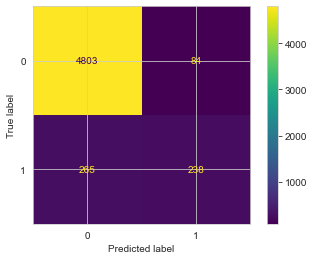

KNN


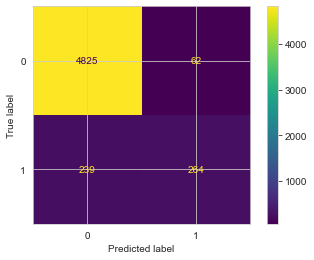

In [156]:
#y_train predict

print('Logistic LogisticRegression')
cm = confusion_matrix(y_train_enc, y_pred_train_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

print('KNN')
cm = confusion_matrix(y_train_enc, y_pred_train_knn, labels=knmod.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knmod.classes_)

disp.plot()
plt.show()

- untuk LogisticRegression
1. Dari analisa diatas didapat bahwa y_train meakukan kesalahan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,93
2. pada tabel 0 data yang diprediksi bener adalah 4.803 dan data  81 masuk ke label 1 
3. pada tabel 1 data yang diprediksi bener adalah 238 dan data 265 masuk ke label 0

- untuk KNN
1. Dari analisa diatas didapat bahwa y_train meakukan kesalahan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,94
2. pada tabel 0 data yang diprediksi bener adalah 4.825 dan data  62 masuk ke label 1 
3. pada tabel 1 data yang diprediksi bener adalah 264 dan data 239 masuk ke label 0

In [157]:
print("LR")
print(classification_report(y_train_enc,y_pred_train_lr))

print('KNN')
print(classification_report(y_train_enc,y_pred_train_knn))

LR
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4887
           1       0.74      0.47      0.58       503

    accuracy                           0.94      5390
   macro avg       0.84      0.73      0.77      5390
weighted avg       0.93      0.94      0.93      5390

KNN
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4887
           1       0.81      0.52      0.64       503

    accuracy                           0.94      5390
   macro avg       0.88      0.76      0.80      5390
weighted avg       0.94      0.94      0.94      5390



- pada y train LR :

1. precision untuk 0 yaitu 0.95(95%) yg artinya berhasil meprediksi 0.95% status no dan 5% di salah meprediksi status tersebut

2. precision untuk 1 yaitu 0.74 yg artinya berhasil meprediksi 74% status yes dan 26% salah meprediksi status tersebut

3. recall untuk 0 yaitu 0.98(98%) yg artinya berhasil meprediksi 98% orang yang memiliki status no dan 2% salah meprediksi status tersebut

4. recall untuk 1 yaitu 0.47 yg artinya berhasil meprediksi 47% status yes dan 53% di salah meprediksi status tersebut

5. Kesalahan prediksi tersebut dapat mengakibat variable yang status froud malah mendapat status tidak froud dimana itu adalah sebuah kerugian

- pada y train KNN :

1. precision untuk 0 yaitu 0.95(95%) yg artinya berhasil meprediksi 0.95% status no dan 5% di salah meprediksi status tersebut

2. precision untuk 1 yaitu 0.81 yg artinya berhasil meprediksi 81% status yes dan 19% salah meprediksi status tersebut

3. recall untuk 0 yaitu 0.99(99%) yg artinya berhasil meprediksi 99% orang yang memiliki status no dan 1% salah meprediksi status tersebut

4. recall untuk 1 yaitu 0.52 yg artinya berhasil meprediksi 52% status yes dan 48% di salah meprediksi status tersebut

5. Kesalahan prediksi tersebut dapat mengakibat variable yang status froud malah mendapat status tidak froud dimana itu adalah sebuah kerugian

`dari logistic regression dan knn peneliti melihat bahwa model knn lebih baik dalam recall false negativ dimana data froud masuk ke data tidak froud atau sebaliknnya`

## 10- Hyperparameter Tuning Model

In [176]:
#define dari parameter yang ingin kita cari di gridsearch
hyperparameterslr = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter': [100, 1000]}

In [177]:
#define variable gridsearch
grid_searchlr = GridSearchCV(LogisticRegression(),hyperparameterslr,refit=True,verbose=2)

In [178]:
#mencari parameter LR terbaik dengan grid search
grid_searchlr.fit(X_train_pipline,y_train_enc)
print("Best parameters LR : {}".format(grid_searchlr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchlr.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, sol

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_ite

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_ite

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

Best parameters LR : {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.94


In [179]:
#define dari parameter yang ingin kita cari di gridsearch
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,2))
p=[1,2]
hyperparametersknn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [180]:
#define variable gridsearch
grid_searchknn = GridSearchCV(KNeighborsClassifier(),hyperparametersknn,refit=True,verbose=2)

In [181]:
#mencari parameter LR terbaik dengan grid search
grid_searchknn.fit(X_train_pipline,y_train_enc)
print("Best parameters LR : {}".format(grid_searchknn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchknn.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.2s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.2s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.2s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.2s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.2s
[CV] END ....................leaf_size=2, n_neighbors=1, p=1; total time=   0.5s
[CV] END ....................leaf_size=2, n_neigh

In [182]:
#define model setelah dapat param dari grid search
lr_tuning=grid_searchlr.best_estimator_

In [183]:
#define model setelah dapat param dari grid search
knn_tuning=grid_searchknn.best_estimator_

In [184]:
#melihat isi parameter model lr
lr_tuning
     

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [185]:
#melihat isi parameter model knn
knn_tuning
     

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [186]:
#validation score setelah model di tuning
scores_lr_tuning = cross_val_score(lr_tuning, X_train_pipline, y_train,cv=5)
scores_lr_knn = cross_val_score(knn_tuning, X_train_pipline, y_train,cv=5)

In [187]:
#melihat mean dari hasil validation model setelah di tuning
#memakai method mean() untuk mencari mean
print('LogisticRegression score sebelum di tuning', scoreslr.mean())
print('LogisticRegression score seetelah di tuning', scores_lr_tuning.mean())
print('====================================================================')
print('KNeighborsClassifier sebelum score',scores_knmod.mean())
print('KNN KNeighborsClassifier seetelah di tuning', scores_lr_tuning.mean())

LogisticRegression score sebelum di tuning 0.9337662337662337
LogisticRegression score seetelah di tuning 0.9382189239332096
KNeighborsClassifier sebelum score 0.9272727272727274
KNN KNeighborsClassifier seetelah di tuning 0.9382189239332096


In [188]:
#melihat std dari hasil validation model setelah di tuning
print('LogisticRegression score sebelum di tuning', scoreslr.std())
print('LogisticRegression score seetelah di tuning', scores_lr_tuning.std())
print('====================================================================')
print('KNeighborsClassifier sebelum score',scores_knmod.std())
print('KNN KNeighborsClassifier seetelah di tuning', scores_lr_tuning.std())

LogisticRegression score sebelum di tuning 0.007458163726249271
LogisticRegression score seetelah di tuning 0.007572664798500402
KNeighborsClassifier sebelum score 0.002662838607496688
KNN KNeighborsClassifier seetelah di tuning 0.007572664798500402


In [189]:
#membuat dict untuk mengetahui nilai tertinggi
scores = {
    'LogisticRegression': scoreslr.mean(),
    'KNeighborsClassifier': scores_knmod.mean(),
    'LogisticRegression_tuning': scores_lr_tuning.mean(),
    'KNeighborsClassifier_tuning': scores_lr_knn.mean()
   
}

max_score = max(scores.values())

for model, score in scores.items():
    if score == max_score:
        print(f"Nilai Score Tertinggi dengan metode Validation score adalah: {model} = {score}")

Nilai Score Tertinggi dengan metode Validation score adalah: LogisticRegression_tuning = 0.9382189239332096


In [190]:
#membuat dict untuk mengetahui nilai std terendah
scores = {
    'LogisticRegression': scoreslr.std(),
    'KNeighborsClassifier': scores_knmod.std(),
    'LogisticRegression_tuning': scores_lr_tuning.std(),
    'KNeighborsClassifier_tuning': scores_lr_knn.std()
   
}

min_score = min(scores.values())

for model, score in scores.items():
    if score == min_score:
        print(f"Nilai Score Tertinggi dengan metode Validation score adalah: {model} = {score}")

Nilai Score Tertinggi dengan metode Validation score adalah: KNeighborsClassifier = 0.002662838607496688


In [191]:
#model tuning predict
y_pred_train_lr_model_tuning = lr_tuning.predict(X_train_pipline)
y_pred_train_knn_model_tuning = knn_tuning.predict(X_train_pipline)


logistic regression


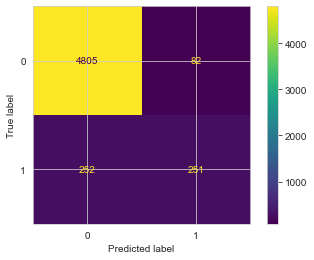

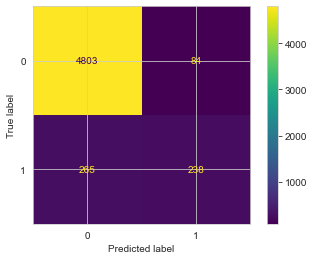

In [192]:
#y_train setelah tuning  predik
print('logistic regression')
cm = confusion_matrix(y_train_enc, y_pred_train_lr_model_tuning, labels=lr_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_tuning.classes_)

disp.plot()
plt.show()

#y_train predict
cm = confusion_matrix(y_train_enc, y_pred_train_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

In [193]:
print('sebelum di tuning')
print(classification_report(y_train_enc,y_pred_train_lr))
print('')
print('setelah di tuning')
print(classification_report(y_train_enc,y_pred_train_lr_model_tuning))

sebelum di tuning
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4887
           1       0.74      0.47      0.58       503

    accuracy                           0.94      5390
   macro avg       0.84      0.73      0.77      5390
weighted avg       0.93      0.94      0.93      5390


setelah di tuning
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4887
           1       0.75      0.50      0.60       503

    accuracy                           0.94      5390
   macro avg       0.85      0.74      0.78      5390
weighted avg       0.93      0.94      0.93      5390



In [195]:
#Tampilan predict model setelah di tuning dan sebelum di tuning
print('-----TRAIN-----')
print('accuracy score train LR sebelum di tuning : ',accuracy_score(y_train_enc,y_pred_train_lr))
print('accuracy score train LR setelah di tuning : ',accuracy_score(y_train_enc,y_pred_train_lr_model_tuning))
print('')

-----TRAIN-----
accuracy score train LR sebelum di tuning :  0.9352504638218924
accuracy score train LR setelah di tuning :  0.9380333951762523



KNN setelah di tuning


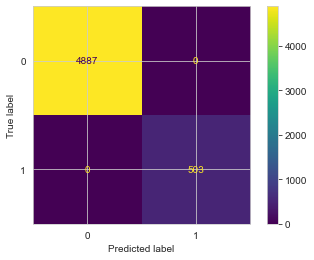

KNN sebelum di tuning


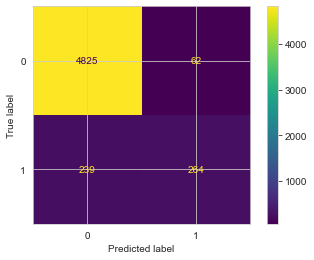

In [196]:
#y_train setelah tuning  predik
print('KNN setelah di tuning')
cm = confusion_matrix(y_train_enc, y_pred_train_knn_model_tuning, labels=knn_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_tuning.classes_)

disp.plot()
plt.show()

#y_train predict
print('KNN sebelum di tuning')
cm = confusion_matrix(y_train_enc, y_pred_train_knn, labels=knmod.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knmod.classes_)

disp.plot()
plt.show()

In [197]:
print('KNN sebelum di tuning')
print(classification_report(y_train_enc,y_pred_train_knn))
print('')
print('KNN setelah di tuning')
print(classification_report(y_train_enc,y_pred_train_knn_model_tuning))

KNN sebelum di tuning
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4887
           1       0.81      0.52      0.64       503

    accuracy                           0.94      5390
   macro avg       0.88      0.76      0.80      5390
weighted avg       0.94      0.94      0.94      5390


KNN setelah di tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4887
           1       1.00      1.00      1.00       503

    accuracy                           1.00      5390
   macro avg       1.00      1.00      1.00      5390
weighted avg       1.00      1.00      1.00      5390



In [198]:
#Tampilan predict model setelah di tuning dan sebelum di tuning
print('-----TRAIN-----')
print('accuracy score train KNN sebelum di tuning : ',accuracy_score(y_train_enc,y_pred_train_knn))
print('accuracy score train KNN setelah di tuning : ',accuracy_score(y_train_enc,y_pred_train_knn_model_tuning))
print('')

-----TRAIN-----
accuracy score train KNN sebelum di tuning :  0.9441558441558442
accuracy score train KNN setelah di tuning :  1.0



## 11 Save Model

In [237]:
# Save the Files

import joblib
import json

with open('lr_tuning.pkl', 'wb') as file_1:
  joblib.dump(lr_tuning, file_1)

In [238]:
with open('knn_tuning.pkl', 'wb') as file_1:
  joblib.dump(knn_tuning, file_1)